In [3]:
import pandas as pd
import numpy as np
dataset=pd.read_csv('sonar.csv')

In [4]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [5]:
dataset

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R


In [6]:
print(dataset.shape)

(207, 61)


In [8]:
set_option('display.max_rows', 500)
print(dataset.dtypes)


0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
0.0986    float64
0.1539    float64
0.1601    float64
0.3109    float64
0.2111    float64
0.1609    float64
0.1582    float64
0.2238    float64
0.0645    float64
0.0660    float64
0.2273    float64
0.3100    float64
0.2999    float64
0.5078    float64
0.4797    float64
0.5783    float64
0.5071    float64
0.4328    float64
0.5550    float64
0.6711    float64
0.6415    float64
0.7104    float64
0.8080    float64
0.6791    float64
0.3857    float64
0.1307    float64
0.2604    float64
0.5121    float64
0.7547    float64
0.8537    float64
0.8507    float64
0.6692    float64
0.6097    float64
0.4943    float64
0.2744    float64
0.0510    float64
0.2834    float64
0.2825    float64
0.4256    float64
0.2641    float64
0.1386    float64
0.1051    float64
0.1343    float64
0.0383    float64
0.0324    float64
0.0232    float64
0.0027    float64
0.0065    float64
0.0159    float64
0.0072    float64
0.0167    

In [14]:
# Head
set_option('display.width', 100)
print(dataset.head(20))

    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111  ...  0.0027  \
0    0.045   0.052   0.084   0.069   0.118   0.258   0.216   0.348   0.334   0.287  ...   0.008   
1    0.026   0.058   0.110   0.108   0.097   0.228   0.243   0.377   0.560   0.619  ...   0.023   
2    0.010   0.017   0.062   0.021   0.021   0.037   0.110   0.128   0.060   0.126  ...   0.012   
3    0.076   0.067   0.048   0.039   0.059   0.065   0.121   0.247   0.356   0.446  ...   0.003   
4    0.029   0.045   0.028   0.017   0.038   0.099   0.120   0.183   0.210   0.304  ...   0.004   
5    0.032   0.096   0.132   0.141   0.167   0.171   0.073   0.140   0.208   0.351  ...   0.020   
6    0.052   0.055   0.084   0.032   0.116   0.092   0.103   0.061   0.146   0.284  ...   0.008   
7    0.022   0.037   0.048   0.048   0.065   0.059   0.075   0.010   0.068   0.149  ...   0.015   
8    0.016   0.017   0.035   0.007   0.019   0.067   0.106   0.070   0.096   0.025  ...   0.009   
9    0.004

In [13]:
# Descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())

        0.0200     0.0371   0.0428   0.0207   0.0954   0.0986   0.1539   0.1601   0.3109   0.2111  \
count  207.000  2.070e+02  207.000  207.000  207.000  207.000  207.000  207.000  207.000  207.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.177    0.208   
std      0.023  3.304e-02    0.039    0.047    0.056    0.059    0.062    0.085    0.118    0.135   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.640e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.106    0.112    0.152    0.181   
75%      0.036  4.810e-02    0.058    0.066    0.101    0.134    0.153    0.170    0.231    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

       ...   0.0232     0.0027     0.0065   0.0159     0.0072     0.0167     0.0180     0.

In [18]:
# Class distribution
print(dataset.groupby(60).size())

KeyError: 60

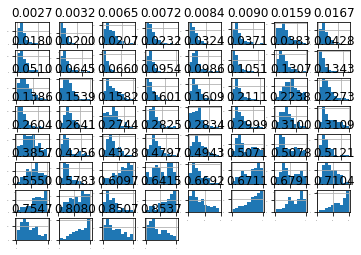

In [16]:
 #Histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

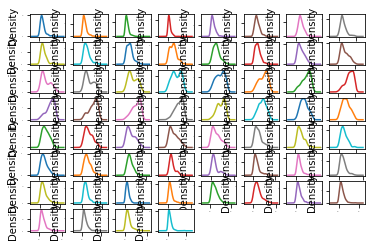

In [25]:
# Density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, sharey=False, legend=False,
            fontsize=1)
pyplot.show()

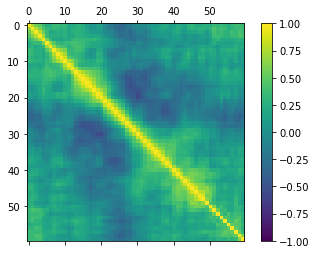

In [26]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [27]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [28]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [29]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [30]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\GT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\GT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\GT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\GT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\GT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

LR: 0.757721 (0.065198)
LDA: 0.701838 (0.086338)
KNN: 0.756618 (0.111644)
CART: 0.726471 (0.099417)
NB: 0.700368 (0.132161)
SVM: 0.547059 (0.106399)


C:\Users\GT\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\GT\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\GT\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\GT\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa